# Data Transformation and Mapping 
- **apply**: allous us to apply a function to each element, row or column in a DataFrame or Series
- **map**: is used to map values in a Series according to a dictionary or another Series
- **replace**: replace allows for replacin specific values in the DataFrame with new value
- **astype**: this is used to convert data type
- **pipe**: it allows chaining and using complex functions that operateon the entire DataFrame. This can be used for complex transformation operation 

## Apply

In [16]:
#convert marks to scale of 1
import pandas as pd
students = pd.read_csv('../Week_3_Mathmatics/data/student.csv')
students['mark_percent'] = students['mark'].apply(lambda m: m/100)
students.head()

,id,name,class,mark,gender,mark_percent
0,1,John Deo,Four,75,NaN,0.75
1,2,Max Ruin,Three,85,male,0.85
2,3,Arnold,NaN,55,male,0.55
3,4,Krish Star,Four,60,female,0.60
4,5,John Mike,Four,60,female,0.60


## MAP

In [17]:
# replace
students['grade']= students['class'].map({'One':1,'Two':2, 'Three':3, 'Four':4, 'Five':5, 'Six':6, 'Severn':7, 'Eight':8, 'Nine':9, 'Ten': 10})
students['gender_code'] = students['gender'].map({'male':1 , 'female':2})
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,John Deo,Four,75,NaN,0.75,4.0,NaN
1,2,Max Ruin,Three,85,male,0.85,3.0,1.0
2,3,Arnold,NaN,55,male,0.55,NaN,1.0
3,4,Krish Star,Four,60,female,0.60,4.0,2.0
4,5,John Mike,Four,60,female,0.60,4.0,2.0


## Replace

In [18]:
#replace soecific values in the 'class' column 
students['class'] = students['class'].replace({'Four': '4th', 'Ten': '10th', 'Eight':'8th'})
#replace name 'John Doe' with 'JaiRam' (replace specific value)
students['name'] = students['name'].replace({'John Deo':'Jai Ram'})
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,Jai Ram,4th,75,NaN,0.75,4.0,NaN
1,2,Max Ruin,Three,85,male,0.85,3.0,1.0
2,3,Arnold,NaN,55,male,0.55,NaN,1.0
3,4,Krish Star,4th,60,female,0.60,4.0,2.0
4,5,John Mike,4th,60,female,0.60,4.0,2.0


## astype

In [19]:
# Convert 'marks' column to float
students['mark'] = students['mark'].astype(float)
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,Jai Ram,4th,75.0,NaN,0.75,4.0,NaN
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1.0
2,3,Arnold,NaN,55.0,male,0.55,NaN,1.0
3,4,Krish Star,4th,60.0,female,0.60,4.0,2.0
4,5,John Mike,4th,60.0,female,0.60,4.0,2.0


## pipe

In [20]:
# create a function that triples marks and pipes it to the pandas DataFrame
def triple_marks(df):
    df['mark'] = df['mark'] * 3
    return df

def check_result(df):
    df['result'] = df['mark'].apply(lambda m : 'Pass' if m>40 else 'Fail')
    return df

students = students.pipe(check_result)
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code,result
0,1,Jai Ram,4th,75.0,NaN,0.75,4.0,NaN,Pass
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1.0,Pass
2,3,Arnold,NaN,55.0,male,0.55,NaN,1.0,Pass
3,4,Krish Star,4th,60.0,female,0.60,4.0,2.0,Pass
4,5,John Mike,4th,60.0,female,0.60,4.0,2.0,Pass


# Data Cleaning and Manipulation 

- Handle Missing Data 
- Handle Duplicates
- One-Hot-Encoding
- Normalization

## Handle Missing Data

In [21]:
from IPython.display import display

students = pd.read_csv('../Week_3_Mathmatics/data/student.csv')
display(students.head())
#students.dropna(axis=0, how = 'any', inplace=True)

#students = students.fillna(1) #replace missing valyes with 1

students.fillna(method = 'ffill') #fill with previous row value
students.fillna(method = 'bfill') #fill with next row
students['mark'].fillna(50) #only fill empty value of Name column
students.fillna({'mark':50, 'gender': 'Male'}) #replace mark with 50 if its empty and gender
df_interpolated = students.interpolate()
students.fillna(df_interpolated)
students['mark'].fillna(students['mark'].mean())

display(students.head())

,id,name,class,mark,gender
0,1,John Deo,Four,75,NaN
1,2,Max Ruin,Three,85,male
2,3,Arnold,NaN,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


/var/folders/t6/k32grwjn1430t7rqgxsdy7dc0000gn/T/ipykernel_61889/2857332330.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method = 'ffill') #fill with previous row value
/var/folders/t6/k32grwjn1430t7rqgxsdy7dc0000gn/T/ipykernel_61889/2857332330.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method = 'bfill') #fill with next row
/var/folders/t6/k32grwjn1430t7rqgxsdy7dc0000gn/T/ipykernel_61889/2857332330.py:13: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = students.interpolate()


,id,name,class,mark,gender
0,1,John Deo,Four,75,NaN
1,2,Max Ruin,Three,85,male
2,3,Arnold,NaN,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


## Handle Duplicate Data
- check duplicates
- drop duplicates

In [22]:
duplicates = students.duplicated() #check duplicate
students.drop_duplicates()
duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

• One Hot Encoding is a method for converting categorical variables into a binary format. It creates new binary columns (Os and 1s) for each category in the original variable. Each category in the original column is represented as a separate column, where a value of 1 indicates the presence of that category, and 0 indicates its absence For example we replace the country name with numerical
value e.g. America = 1, India=2 Nepal=3

In [23]:
students = pd.read_csv('../Week_3_Mathmatics/data/student.csv')
df_pandas_encoded = pd.get_dummies(students, columns=['class'])
print(f"One-Hot Encoded Data using Pandas: \n")
display(df_pandas_encoded)

One-Hot Encoded Data using Pandas: 



,id,name,mark,gender,class_Eight,class_Fifth,class_Five,class_Four,class_Nine,class_Seven,class_Six,class_Three
0,1,John Deo,75,NaN,False,False,False,True,False,False,False,False
1,2,Max Ruin,85,male,False,False,False,False,False,False,False,True
2,3,Arnold,55,male,False,False,False,False,False,False,False,False
3,4,Krish Star,60,female,False,False,False,True,False,False,False,False
4,5,John Mike,60,female,False,False,False,True,False,False,False,False
5,6,Alex John,55,male,False,False,False,True,False,False,False,False
6,7,My John Rob,78,male,False,True,False,False,False,False,False,False
7,8,Asruid,85,male,False,False,True,False,False,False,False,False
8,9,Tes Qry,78,male,False,False,False,False,False,False,True,False
9,10,Big John,55,female,False,False,False,True,False,False,False,False


## Data Normalization

In [25]:
import numpy as np
import pandas as pd
products =pd.read_csv('../Week_3_Mathmatics/data/product-data.csv')
#Single Feature Scaling
products['Sales_Single_Scale']=products['Sales']/ products['Sales'].max()

#log
products['Sales_Log_Scale']=np.log1p(products['Sales'])

#Clipping
products['Discount_Clipped']=products['Discount_Percentage'].clip(lower=5,upper=15)

products

,Product_ID,Sales,Price,Customer_Rating,Discount_Percentage,Sales_Single_Scale,Sales_Log_Scale,Discount_Clipped
0,1,500,200,4.2,10,0.50,6.216606,10
1,2,700,450,3.9,15,0.70,6.552508,15
2,3,800,300,4.5,12,0.80,6.685861,12
3,4,900,350,4.8,8,0.90,6.803505,8
4,5,1000,500,4.0,5,1.00,6.908755,5
5,6,300,250,3.7,20,0.30,5.707110,15
6,7,450,275,4.3,17,0.45,6.111467,15
7,8,620,320,3.8,7,0.62,6.431331,7
8,9,750,400,4.1,6,0.75,6.621406,6
9,10,850,375,4.6,14,0.85,6.746412,14


# Grouping and Aggregate
- Grouping consists of three operations
    - split
    - Apply
    - Combine

## Group by

In [32]:
import numpy as np
from IPython.display import display

students = pd.read_csv('../Week_3_Mathmatics/data/student.csv')

#group data based on Gender
gender_data = students.groupby('gender')
display(gender_data.count())
gender_data['mark'].mean() #
#Standard deviation (sd())

group_by_class = students.groupby('class')
display(group_by_class['mark'].mean())
display(group_by_class['id'].count())

,id,name,class,mark
gender,,,,
female,16,16,16,16
male,18,18,17,18


class
Eight    79.000000
Fifth    78.000000
Five     80.000000
Four     70.888889
Nine     41.500000
Seven    77.600000
Six      82.571429
Three    83.000000
Name: mark, dtype: float64

class
Eight     1
Fifth     1
Five      2
Four      9
Nine      2
Seven    10
Six       7
Three     2
Name: id, dtype: int64

## Aggregation
- Count()
- sum()
- mean()
- median()
- min()
- max()
- model()
- std()
- VAR()

## Sorting

### Sort By Index
### Sort By Value
 - Ascending
- Descending
- Sort by Date
- Sorting with key Function


In [34]:
country_data_list = [
            ['Afghanisthan', 1952, 845333, 'Asia'],
            ['Australia', 1957, 9712569, 'Oceania'],
            ['Brazil', 1962, 76039390, 'South America'],
            ]
country_data = pd.DataFrame(country_data_list, columns = ['country', 'Year', 'Population', 'Continent'])
new_sorted_data = country_data.sort_values(by=['country'], ascending=True)
display(new_sorted_data)

sort_by_descending = country_data.sort_values(by=['country'],ascending=False)
display(sort_by_descending)
sort_by_population = country_data.sort_values(by=['Population', 'country'], ascending=False)
display(sort_by_population)

,country,Year,Population,Continent
0,Afghanisthan,1952,845333,Asia
1,Australia,1957,9712569,Oceania
2,Brazil,1962,76039390,South America


,country,Year,Population,Continent
2,Brazil,1962,76039390,South America
1,Australia,1957,9712569,Oceania
0,Afghanisthan,1952,845333,Asia


,country,Year,Population,Continent
2,Brazil,1962,76039390,South America
1,Australia,1957,9712569,Oceania
0,Afghanisthan,1952,845333,Asia


## Sort  By Date

In [39]:
data= pd.read_csv('../Week_3_Mathmatics/data/student-admission.csv')

# convert to datetime
data['AsmissionDate'] = pd.to_datetime(data['AdmissionDate'])

#sort by AdmissionDate
sorted_by_date = data.sort_values( by=['AdmissionDate','Name'],ascending=False)
sorted_by_date

,Unnamed: 0,AdmissionDate,StudentID,Name,Stream,AsmissionDate
0,0,2021-01-25,7,Ram,CSE,2021-01-25
1,1,2021-01-22,5,Shyam,ECE,2021-01-22
4,4,2021-01-22,6,Lucky,CSE,2021-01-22
6,6,2021-01-21,4,Danny,EEE,2021-01-21
2,2,2021-01-20,3,Mohan,Civil,2021-01-20
3,3,2021-01-18,2,Sohan,Mechanical,2021-01-18
5,5,2021-01-17,1,Abhinav,IT,2021-01-17


## Chart Types Organized by data analysis goals
Category 
Relationship
- Scatter Plot
- Bubble Chart
Heat Map
Density Plot
Correlation Matrix

Distributions 
- Histogram
- Box Plot (Box-and-Whisket Plot)
- Violin Plot 
- Frequency Polygon
- Stem-and-

## Data Comparision Visualization

- Bar Charts
- Line Graph
- Multiple Line Graph

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Compate GDP Growth of NEPAL, India and China
- BAR Chart
- Line Graph

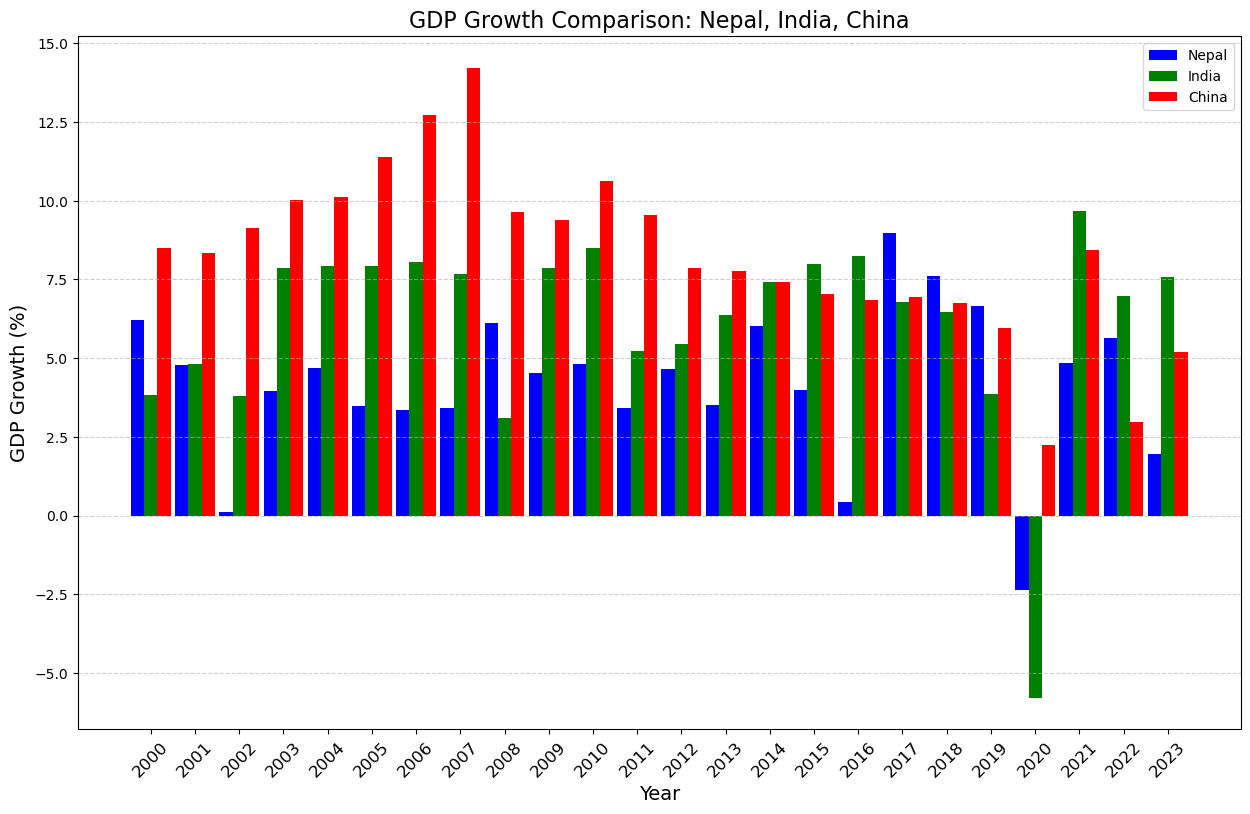

In [4]:
nep_ind_china_gdp_data = pd.read_csv('../Week_3_Mathmatics/data/nep-india-china-gdp.csv')

# Set up the figure size
plt.figure(figsize=(15, 9))

# Define the width of the bars
width = 0.3
x = range(len(nep_ind_china_gdp_data['Year']))

# Plotting the bars for Nepal, India, and China
plt.bar([i - width for i in x], nep_ind_china_gdp_data['Nepal'], width=width, label='Nepal', color='blue')
plt.bar(x, nep_ind_china_gdp_data['India'], width=width, label='India', color='green')
plt.bar([i + width for i in x], nep_ind_china_gdp_data['China'], width=width, label='China', color='red')

# Adding titles and labels
plt.title('GDP Growth Comparison: Nepal, India, China', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP Growth (%)', fontsize=14)
plt.xticks(x, nep_ind_china_gdp_data['Year'], fontsize=12, rotation=45)
plt.legend()

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the chart
plt.show()

## Line Graph

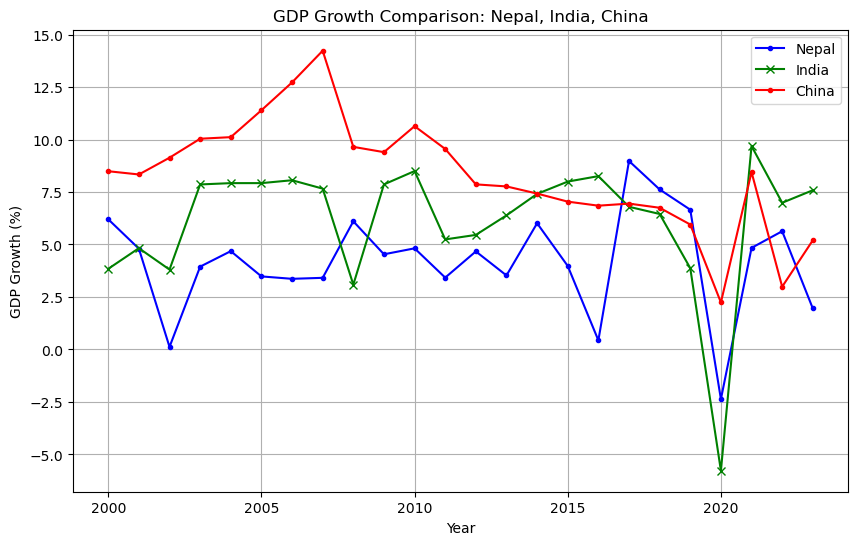

In [11]:
nep_ind_china_gdp_data = pd.read_csv('../Week_3_Mathmatics/data/nep-india-china-gdp.csv')
import matplotlib.pyplot as plt

#Data 
years = nep_ind_china_gdp_data['Year']
nepal_gdp = nep_ind_china_gdp_data['Nepal']
india_gdp = nep_ind_china_gdp_data['India']
china_gdp = nep_ind_china_gdp_data['China']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(nep_ind_china_gdp_data['Year'], nep_ind_china_gdp_data['Nepal'], label='Nepal', color='blue', marker='.')
plt.plot(nep_ind_china_gdp_data['Year'], nep_ind_china_gdp_data['India'], label='India', color='green', marker='x')
plt.plot(nep_ind_china_gdp_data['Year'], nep_ind_china_gdp_data['China'], label='China', color='red', marker='.')

# Adding titles and labels
plt.title('GDP Growth Comparison: Nepal, India, China')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.legend()

# Adding grid lines
plt.grid(True)

# Show the plot
plt.show()

# Visualize Relationship Between Data

- **Scatter Plot:** A scatter plot identifies a possible relationship between changes observed in two different sets of variables.


- **Bubble Chart:** A bubble chart can be used to represent the relationship between x (age), y (income), and bubble size (expense).


- **Heat Map:** Heat maps are graphical representations of data that use colors to show the intensity of a variable or a relationship.


- **Density Plot:** A density plot visualizes the distribution of data over a continuous interval or time period.


- **Correlation Matrix:** A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a dataset.

In [3]:
from IPython.display import display
import numpy as np
 # Create the scatter plot
nepal_economy = pd.read_csv('../Week_3_Mathmatics/data/nepal-economy.csv')
nepal_economy['no_of_people_in_foreign_employment'] = nepal_economy['no_of_people_in_foreign_employment'].apply(lambda n : n/1000)
display(nepal_economy.head())

plt.figure(figsize=(5, 3))
plt.scatter(
    nepal_economy['GDP'],
    nepal_economy['no_of_people_in_foreign_employment'],
    color='purple',
    edgecolor='black'
)

# Fit a linear regression model to the data
x = nepal_economy['GDP']
y = nepal_economy['no_of_people_in_foreign_employment']
m, c = np.polyfit(x, y, 1) #1 is degree of polynomial y = mx+c is of degree 1

# Plot the trend line
plt.plot(x, m * x + c, color = 'red', linewidth=1, label='GDP-FE-Trend-Line')
plt.title('GDP vs No Of people in foreign employment')
plt.xlabel('GDP (USD Billion)')
plt.ylabel('People in FOreign Employment (K)')
plt.grid(True)

#Display the plot
plt.show()

NameError: name 'pd' is not defined